# Machine Learning Prediction

## Project : Flights Delays Analysis & Prediction

### **Import libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import seaborn as sns
from datetime import datetime as dt  
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score,auc
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

### Loading Data

In [5]:
# Showing first 3 flight rows
df_flight = pd.read_csv('Airline_Delay_Analysis/flights.csv')
df_flight.head(3)

/Users/hanzianngoran/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Showing first 3 airline name and IATA code
df_airlines = pd.read_csv('Airline_Delay_Analysis/airlines.csv')
df_airlines.head(3)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.


In [7]:
df_flight.shape, df_airlines.shape

((5819079, 31), (14, 2))

In [8]:
df_flight.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

### *Flights Dataset*

Flights dataset has multiple feature, Some of them are time of day, some are just mintues and some of them none time valuse. But in csv all are in numeric and string format.

Time of Days :

- ARRIVAL_TIME
- DEPARTURE_TIME
- SCHEDULED_DEPARTURE
- WHEELS_ON
- WHEELS_OFF
- SCHEDULED_ARRIVAL

Time in Minutes:

- DEPARTURE_DELAY
- TAXI_IN
- TAXI_OUT
- SCHEDULED_TIME
- ELAPSE_TIME
- AIR_TIME
- ARRIVAL_DELAY
- AIR_SYSTEM_DELAY
- SECURITY_DELAY
- AIRLINE_DELAY
- LATE_AIRCRAFT_DELAY

None Time Values:

- AIRLINE
- FLIGHT_NUMBER
- TAIL_NUMBER
- ORIGIN_AIRPORT
- DESTINATION_AIRPORT
- YEAR
- MONTH
- DAY
- DAY_OF_WEEK

Target Feature:

- AIRLINE_DELAY: It's difference between SCHEULED_ARRIVAL and ARRIVAL_TIME.

### *Data type Analyzing*

We are displaying data type of every feature in flights dataset. This will help in understadning of data and further analysis.

In [9]:
#  Check any null values?
print(df_flight.isna().sum())

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64


### Droping Features

- FLIGHT_NUMBER: This a unique identifier for the flight.
- TAIL_NUMBER: This is also a unique identifier number for flight. It's called aircraft registration number.
- CANCELLATION_REASON, AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY: These all the feature, we will get after arrival on destinaiton airport. So i am removing them.

In [10]:
# Drop features
variables_to_remove=['FLIGHT_NUMBER','TAIL_NUMBER','CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',  'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 
              'WEATHER_DELAY', ]
df_flight.drop(variables_to_remove, axis=1, inplace=True)
print(df_flight.shape)
df_flight

(5819079, 23)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,...,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,...,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,...,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,...,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,...,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,LAX,BOS,2359,2355.0,-4.0,...,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0
5819075,2015,12,31,4,B6,JFK,PSE,2359,2355.0,-4.0,...,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0
5819076,2015,12,31,4,B6,JFK,SJU,2359,2350.0,-9.0,...,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0
5819077,2015,12,31,4,B6,MCO,SJU,2359,2353.0,-6.0,...,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0


In [11]:
# Create the columns 'Fligt Date' by the combination of YEAR, MONTH, DAY
df_flight['FLIGHT_DATE'] = pd.to_datetime(df_flight[['YEAR', 'MONTH', 'DAY']])
df_flight

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,FLIGHT_DATE
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,...,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,2015-01-01
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,...,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,2015-01-01
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,...,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,2015-01-01
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,...,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,2015-01-01
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,...,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,LAX,BOS,2359,2355.0,-4.0,...,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,2015-12-31
5819075,2015,12,31,4,B6,JFK,PSE,2359,2355.0,-4.0,...,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,2015-12-31
5819076,2015,12,31,4,B6,JFK,SJU,2359,2350.0,-9.0,...,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,2015-12-31
5819077,2015,12,31,4,B6,MCO,SJU,2359,2353.0,-6.0,...,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,2015-12-31


## Target Feature

In the below section, we will drive one feature `FLIGHT_DELAY`. Which will be our target feature for Machine Learning Model. It will be drive from `ARRIVAL_DELAY` feature in flights dataset. `ARRIVAL_DELAY` is flight delay in arrival on Destination Airport. 

It's a numeric value, we will convert it to binary `1` or `0`.

`1: Delay`
`0: One Time`

In [12]:
# create the binary classification
df_flight['FLIGHT_DELAY'] = df_flight['ARRIVAL_DELAY'].map( lambda x : 1 if x>0 else 0)
df_flight.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,FLIGHT_DATE,FLIGHT_DELAY
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,...,1448,404.0,4.0,430,408.0,-22.0,0,0,2015-01-01,0
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,...,2330,737.0,4.0,750,741.0,-9.0,0,0,2015-01-01,0
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,...,2296,800.0,11.0,806,811.0,5.0,0,0,2015-01-01,1
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,...,2342,748.0,8.0,805,756.0,-9.0,0,0,2015-01-01,0
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,...,1448,254.0,5.0,320,259.0,-21.0,0,0,2015-01-01,0


### Feature Selection with Importance

Dataset in flights.csv is high in volume(~5819079). For computing, it will require high computation power and time. So for this project we are going to use only one month data (July).

In [13]:
df_flight = df_flight[df_flight['MONTH'] == 7]
print(df_flight.isna().sum())

YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE                   0
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
DEPARTURE_TIME         4507
DEPARTURE_DELAY        4507
TAXI_OUT               4756
WHEELS_OFF             4756
SCHEDULED_TIME            0
ELAPSED_TIME           6334
AIR_TIME               6334
DISTANCE                  0
WHEELS_ON              4947
TAXI_IN                4947
SCHEDULED_ARRIVAL         0
ARRIVAL_TIME           4947
ARRIVAL_DELAY          6334
DIVERTED                  0
CANCELLED                 0
FLIGHT_DATE               0
FLIGHT_DELAY              0
dtype: int64


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

clf = RandomForestClassifier(n_estimators=10, verbose=2)
feature_ls = ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
              'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
              'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'DIVERTED', 'CANCELLED' ]
le=LabelEncoder()

x=df_flight[feature_ls]
y=df_flight.FLIGHT_DELAY
x=x.fillna(0, axis=1)

x['AIRLINE']=le.fit_transform(x['AIRLINE'])
x['ORIGIN_AIRPORT']=le.fit_transform(x['ORIGIN_AIRPORT'])
x['DESTINATION_AIRPORT']=le.fit_transform(x['DESTINATION_AIRPORT']) 
print(x.isna().sum())
print(y.value_counts())

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
DIVERTED               0
CANCELLED              0
dtype: int64
0    321001
1    199717
Name: FLIGHT_DELAY, dtype: int64


In [15]:
clf.fit(x,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.0s finished


RandomForestClassifier(n_estimators=10, verbose=2)

In [16]:
columns=['FEATURE', 'IMPORTANCE']
selected_Feature=pd.DataFrame(columns=columns)
for  X in range(len(clf.feature_importances_)):
    selected_Feature.loc[X]=[feature_ls[X] ,clf.feature_importances_[X]]
selected_Feature.sort_values('IMPORTANCE', ascending=False)

,FEATURE,IMPORTANCE
7,DEPARTURE_DELAY,0.460963
8,TAXI_OUT,0.087423
10,SCHEDULED_TIME,0.081477
11,ELAPSED_TIME,0.065264
15,TAXI_IN,0.046184
12,AIR_TIME,0.045438
9,WHEELS_OFF,0.040112
14,WHEELS_ON,0.038817
13,DISTANCE,0.037529
5,ORIGIN_AIRPORT,0.024027


In [17]:
# remove columns YEAR, MONTH, DAY
remove_list = ['YEAR', 'MONTH', 'DAY','ARRIVAL_DELAY','ELAPSED_TIME' , 'AIR_TIME', 'SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL',
                     'FLIGHT_DATE','ARRIVAL_TIME' , 'WHEELS_ON', 'TAXI_IN','CANCELLED']
df_flight.drop(remove_list, axis=1, inplace=True)
df_flight.head(3)

/Users/hanzianngoran/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,DIVERTED,FLIGHT_DELAY
2889512,3,NK,LAS,IAH,41.0,38.0,11.0,52.0,177.0,1222,0,1
2889513,3,AA,SFO,CLT,2400.0,-5.0,21.0,21.0,303.0,2296,0,0
2889514,3,DL,LAX,MEM,2400.0,-5.0,36.0,36.0,223.0,1619,0,1


In [18]:
# Check null values
df_flight.isna().sum()

DAY_OF_WEEK               0
AIRLINE                   0
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
DEPARTURE_TIME         4507
DEPARTURE_DELAY        4507
TAXI_OUT               4756
WHEELS_OFF             4756
SCHEDULED_TIME            0
DISTANCE                  0
DIVERTED                  0
FLIGHT_DELAY              0
dtype: int64

In [19]:
# Clean the columns with the missing values
df_flight['DEPARTURE_DELAY'] = df_flight['DEPARTURE_DELAY'].fillna(0)
df_flight['TAXI_OUT'] = df_flight['TAXI_OUT'].fillna(0)
df_flight['WHEELS_OFF'] = df_flight['WHEELS_OFF'].fillna(0) 
df_flight['DEPARTURE_TIME'] = df_flight['DEPARTURE_TIME'].fillna(0)
df_flight.isna().sum()

/Users/hanzianngoran/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hanzianngoran/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hanzianngoran/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying

DAY_OF_WEEK            0
AIRLINE                0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
DISTANCE               0
DIVERTED               0
FLIGHT_DELAY           0
dtype: int64

In [20]:
#create dummy columns 
df=pd.get_dummies(df_flight, drop_first=False)
print(df.columns)
print(df.shape)

Index(['DAY_OF_WEEK', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'DISTANCE', 'DIVERTED', 'FLIGHT_DELAY',
       'AIRLINE_AA',
       ...
       'DESTINATION_AIRPORT_TYR', 'DESTINATION_AIRPORT_TYS',
       'DESTINATION_AIRPORT_UST', 'DESTINATION_AIRPORT_VLD',
       'DESTINATION_AIRPORT_VPS', 'DESTINATION_AIRPORT_WRG',
       'DESTINATION_AIRPORT_WYS', 'DESTINATION_AIRPORT_XNA',
       'DESTINATION_AIRPORT_YAK', 'DESTINATION_AIRPORT_YUM'],
      dtype='object', length=646)
(520718, 646)


In [21]:
# Create our features 

y1=df['FLIGHT_DELAY']
y1.value_counts()


0    321001
1    199717
Name: FLIGHT_DELAY, dtype: int64

In [22]:
x1=df.drop(columns=['FLIGHT_DELAY'])

In [23]:
y1.shape, x1.shape

((520718,), (520718, 645))

## Normalization of the data

In [24]:
data_normalized = MinMaxScaler()
data_normalized.fit_transform(x1)

array([[0.33333333, 0.01708333, 0.04741897, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 1.        , 0.02160864, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 1.        , 0.02160864, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.66666667, 0.98125   , 0.02220888, ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.00166667, 0.02761104, ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.98208333, 0.02340936, ..., 0.        , 0.        ,
        0.        ]])

## Model train and Test

In [25]:
# Training and testing the model

lr = LogisticRegression()

dtc = DecisionTreeClassifier()

### Logistic Regression Model

In [26]:
# Train the model
x_train, x_test, y_train,y_test =train_test_split(x1,y1, test_size=.15)
x_train.shape,y_train.shape

((442610, 645), (442610,))

In [27]:
# Fit the Logistic Regression model
lr.fit(x_train,y_train)

/Users/hanzianngoran/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [28]:
# Make the prediction with Logistic Regression
y_pred_lr=lr.predict(x_test)
print("----------------------------- Model Evaluation----------------------- ")
print('Model Accuracy ', accuracy_score(y_pred_lr, y_test))
print("----------------------------- Model Evaluation----------------------- ")
print("Recall Score ",recall_score(y_pred_lr, y_test))
print("----------------------------- Model Evaluation----------------------- ")
print("Precssion Score ",precision_score(y_pred_lr, y_test))

----------------------------- Model Evaluation----------------------- 
Model Accuracy  0.8696420341066216
----------------------------- Model Evaluation----------------------- 
Recall Score  0.8937385192875968
----------------------------- Model Evaluation----------------------- 
Precssion Score  0.7484783626513277


### Decision Tree Classifier Model

In [29]:
# Fit DecisionTreeClassifier Model
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
# Make the prediction
y_pred_cdt=dtc.predict(x_test)
print("----------------------------- Model Evaluation----------------------- ")
print('Model Accuracy ', accuracy_score(y_pred_cdt, y_test))
print("----------------------------- Model Evaluation----------------------- ")
print("Recall Score ",recall_score(y_pred_cdt, y_test))
print("----------------------------- Model Evaluation----------------------- ")
print("Precssion Score ",precision_score(y_pred_cdt, y_test))

----------------------------- Model Evaluation----------------------- 
Model Accuracy  0.8310800430173606
----------------------------- Model Evaluation----------------------- 
Recall Score  0.7777075992287746
----------------------------- Model Evaluation----------------------- 
Precssion Score  0.7823891378503111


### Random Forest Model

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model with 100 trees and other hyperparameters
rfc = RandomForestClassifier()

In [56]:
# Train the model
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=.15, random_state=42)

In [58]:
# Train the model
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [60]:
# Make predictions on the test set
y_pred_rfc = rfc.predict(x_test)
print("----------------------------- Model Evaluation----------------------- ")
print('Model Accuracy ', accuracy_score(y_pred_rfc, y_test))
print("----------------------------- Model Evaluation----------------------- ")
print("Recall Score ",recall_score(y_pred_rfc, y_test))
print("----------------------------- Model Evaluation----------------------- ")
print("Precssion Score ",precision_score(y_pred_rfc, y_test))

----------------------------- Model Evaluation----------------------- 
Model Accuracy  0.8758897936190915
----------------------------- Model Evaluation----------------------- 
Recall Score  0.8884154460719041
----------------------------- Model Evaluation----------------------- 
Precssion Score  0.7754790289908013


## Plotting

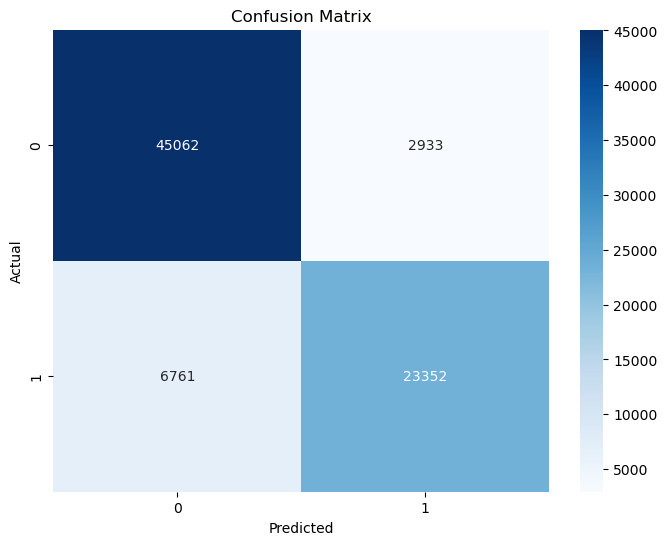

In [70]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

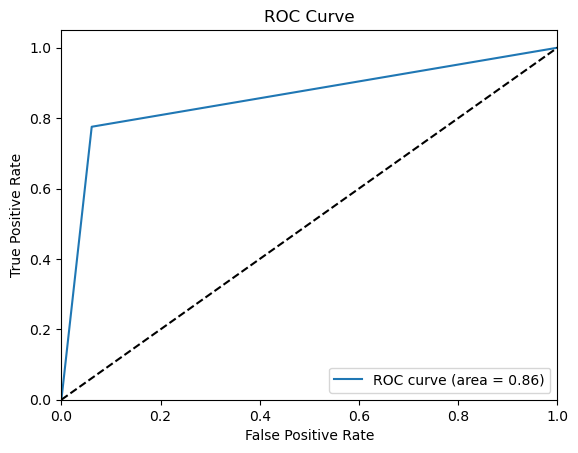

In [63]:
# Plot ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rfc)
auc = roc_auc_score(y_test, y_pred_rfc)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()